In [1]:
import hepi
import smpl
import numpy as np
import hepi.madgraph as mg
import matplotlib.pyplot as plt
import hepi.resummino as rs
import time
from smpl import plot
print (mg.get_path())
rs.set_path("~/git/resummino_ug_to_UX_vNLO/")
print (rs.get_path())

/opt/MG5_aMC_v2_7_0/
~/git/resummino_ug_to_UX_vNLO/


Running: 15 jobs
RESTART (2.3306+/-0.0009)e-08 None None ./output/3d7ad9e225af206be835b8cd7e0488cf2bf514254c93d79c63b0db576abf335e.out
RESTART (8.2797+/-0.0032)e-07 None None ./output/520afb1dc95817e7842f7c7ba57e5fa44652586f22b1e7ebd59ba453c1c001af.out
RESTART (1.3316+/-0.0005)e-06 None None ./output/183f1cc0187d26a76f79a0a90369678c0fe637a32497866a5fa859f2ba414637.out
RESTART (1.8615+/-0.0007)e-06 None None ./output/6f59ed518f326e734ba8306c62cbd40764bf9657b112d68ab65af6d43ac4f2d8.out
RESTART (2.4515+/-0.0010)e-06 None None ./output/a7b0475432fd517c20468d804754bda3f42ca84e53bbe157db9e63b0ef8b3bd2.out
RESTART (3.1019+/-0.0012)e-06 None None ./output/71bd372bf85926744d8e9cd4bb864dc73a64a04e2b883387cddabbf0050583e2.out
RESTART (3.7748+/-0.0015)e-06 None None ./output/05dbd9b82afe3f98f1054b47523489b3206b192701486e10b2f5e4bc49030da0.out
RESTART (4.3727+/-0.0017)e-06 None None ./output/d7c4355e5648ba95b8c849bbd118a1d987260446e358c4d725edcf22062c798b.out
RESTART (4.7179+/-0.0018)e-06 None None

computed AUC using sklearn.metrics.auc: 0.0025844531239389975
computed AUC using sklearn.metrics.auc: 0.00370038214749466
computed AUC using sklearn.metrics.auc: 0.0036908150481101414
computed AUC using sklearn.metrics.auc: 1999.9999999999998
computed AUC using sklearn.metrics.auc: 1999.9999999999998
computed AUC using sklearn.metrics.auc: 1999.9999999999998
computed AUC using sklearn.metrics.auc: 1916.528313808221


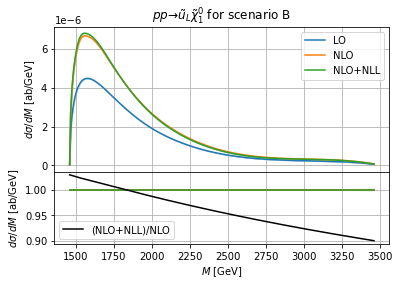

Running: 15 jobs


KeyboardInterrupt: 

In [14]:
from sklearn.metrics import auc
for run_plot in [False,]:
    for diff_m,scenario in [(2000,"scenarioB_mod.in"),(4000,"scenarioA.in"),]:
        pdfs = [("MSHT20lo_as130","MSHT20nlo_as118"), #("CT18NLO","CT18NLO"),  ("NNPDF40_lo_as_01180","NNPDF40_nlo_as_01180")
        ]
        for lo_pdf,nlo_pdf in pdfs:
            for p in [1000002]:
                li = [hepi.Input(hepi.Order.NLO_PLUS_NLL, 13000, p, 1000022, scenario, lo_pdf, nlo_pdf, 1., 1.,precision=0.001,max_iters=25,id="full_fixed_scale_r5")]

                
                li = hepi.scan_invariant_mass(li, diff_m,14+1,low=0.0001)
                #li = hepi.seven_point_scan(li)

                dl = rs.run(li, False)

                if not run_plot:
                    #dl = hepi.scale_error(li,dl)
                    #plot.data([],[],init=True,data_color='k')
                    #mask = dl["LO_SCALE"]!=np.array(None)
                    
                    #hepi.plot(dl, "invariant_mass", "LO",           plot_data=True,fill=True,logy=False, label="LO",xaxis="$M$ [GeV]",yaxis="$d\\sigma/dM$ [pb/GeV]")
                    #hepi.plot(dl, "invariant_mass", "NLO",         plot_data=True,fill=True,logy=False, label="NLO",xaxis="$M$ [GeV]",yaxis="$d\\sigma/dM$ [pb/GeV]")
                    #hepi.plot(dl, "invariant_mass", "NLO_PLUS_NLL", plot_data=True,fill=True,logy=False, label="NLO+NLL",xaxis="$M$ [GeV]",yaxis="$d\\sigma/dM$ [pb/GeV]")
                    #plt.show()
                    #plt.savefig(input.get_output_dir() + get_job_name() +  "_inv_mass_" + str(p) + "_" + str(nlo_pdf) + "_" +str(scenario) + ".pdf")

                    hepi.mass_and_ratio_plot(dl,li,"invariant_mass",combined=True,plot_data=False,fill=True,scenario=scenario[0:8]+ " " + scenario[8],yscale=10**6,unit="ab")
                    plt.show()
                    #plt.savefig(input.get_output_dir()+ get_job_name()+"_mass_and_ratio_" + nlo_pdf + "_" + str(p)+ "_" + str("inv") + "_" +str(scenario) + ".pdf",bbox_inches = 'tight', pad_inches = 0)
    #wait()



Running: 15 jobs
skipskipskipskipskipskipskipskipskipskipskipskipskipskipskip

[4.212694e-15+/-3.5988337e-18 3.6620047e-11+/-1.641452e-14
 1.5518722e-10+/-6.9636193e-14 4.3826109e-10+/-1.9672267e-13
 1.0574545e-09+/-4.7472103e-13 2.3431136e-09+/-1.0519679e-12
 4.8865755e-09+/-2.1939858e-12 9.6190126e-09+/-4.3186158e-12
 1.7648892e-08+/-7.9222788e-12 2.9351264e-08+/-1.3170432e-11
 4.2246275e-08+/-1.8955999e-11 4.9131586e-08+/-2.2071539e-11
 4.1935469e-08+/-1.885524e-11 2.3025456e-08+/-1.0426289e-11
 6.6569632e-09+/-3.042999e-12]
[1.0695348e-11+/-9.0044136e-16 4.1720354e-10+/-2.2787845e-14
 7.6601252e-10+/-8.7518579e-14 1.289077e-09+/-2.3741552e-13
 2.167598e-09+/-5.2933747e-13 3.7214913e-09+/-1.07631e-12
 6.4901241e-09+/-2.2295677e-12 1.1254316e-08+/-4.3516188e-12
 1.8479114e-08+/-7.9523787e-12 2.7285835e-08+/-1.3104663e-11
 3.6768716e-08+/-1.8603964e-11 3.9361701e-08+/-2.0993279e-11
 2.9410129e-08+/-1.7230509e-11 1.2621985e-08+/-8.6495997e-12
 2.2677909e-09+/-1.7352256e-12]
[1.0695663e-11+/-9.0056236e-16 4.1988249e-10+/-2.7582968e-14
 7.7735564e-10+/-1.0996125e-1

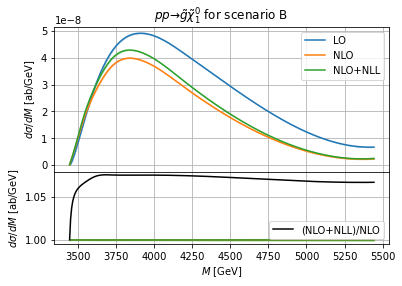

Running: 15 jobs
skipskipskipskipskipskipskipskipskipskipskipskipskipskipskip

[8.5554349e-17+/-7.5561436e-20 6.0506535e-13+/-2.409184e-16
 2.5653669e-12+/-1.0214707e-15 7.2669551e-12+/-2.8938465e-15
 1.7629582e-11+/-7.0218471e-15 3.9401964e-11+/-1.5699361e-14
 8.323698e-11+/-3.3184536e-14 1.6678799e-10+/-6.6559155e-14
 3.1265743e-10+/-1.2496768e-13 5.2975274e-10+/-2.1226523e-13
 7.608254e-10+/-3.0543603e-13 8.2972656e-10+/-3.3391027e-13
 5.692302e-10+/-2.3045835e-13 1.705964e-10+/-6.9515959e-14
 8.7802219e-12+/-3.5442765e-15]
[5.4603095e-13+/-1.5801703e-14 1.67964e-12+/-1.0720034e-14
 1.9964873e-12+/-4.6872698e-15 4.5648018e-12+/-4.3346349e-15
 1.0631318e-11+/-9.1659943e-15 2.3265486e-11+/-1.7641787e-14
 4.8074556e-11+/-3.625839e-14 9.3610493e-11+/-7.0915716e-14
 1.6826254e-10+/-1.3460392e-13 2.6638923e-10+/-2.129314e-13
 3.4112806e-10+/-2.7192495e-13 3.0474746e-10+/-2.4187204e-13
 1.4696441e-10+/-1.1563281e-13 2.3357489e-11+/-1.8284698e-14
 4.209133e-13+/-3.2678952e-16]
[5.4603852e-13+/-1.5801703e-14 1.7011382e-12+/-1.0720755e-14
 2.086855e-12+/-4.717656e-15 4.

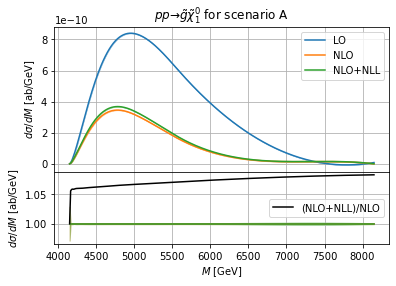

In [13]:
from sklearn.metrics import auc
for run_plot in [False,]:
    for diff_m,scenario in [(2000,"scenarioB_mod.in"),(4000,"scenarioA.in"),]:
        pdfs = [("MSHT20lo_as130","MSHT20nlo_as118"), #("CT18NLO","CT18NLO"),  ("NNPDF40_lo_as_01180","NNPDF40_nlo_as_01180")
        ]
        for lo_pdf,nlo_pdf in pdfs:
            for p in [1000021]:
                li = [hepi.Input(hepi.Order.NLO_PLUS_NLL, 13000, p, 1000022, scenario, lo_pdf, nlo_pdf, 1., 1.,precision=0.001,max_iters=25,id="full_fixed_scale_r3")]

                
                li = hepi.scan_invariant_mass(li, diff_m,14+1)
                #li = hepi.seven_point_scan(li)

                dl = rs.run(li, False)

                if not run_plot:
                    #dl = hepi.scale_error(li,dl)
                    #plot.data([],[],init=True,data_color='k')
                    #mask = dl["LO_SCALE"]!=np.array(None)
                    
                    #hepi.plot(dl, "invariant_mass", "LO",           plot_data=True,fill=True,logy=False, label="LO",xaxis="$M$ [GeV]",yaxis="$d\\sigma/dM$ [pb/GeV]")
                    #hepi.plot(dl, "invariant_mass", "NLO",         plot_data=True,fill=True,logy=False, label="NLO",xaxis="$M$ [GeV]",yaxis="$d\\sigma/dM$ [pb/GeV]")
                    #hepi.plot(dl, "invariant_mass", "NLO_PLUS_NLL", plot_data=True,fill=True,logy=False, label="NLO+NLL",xaxis="$M$ [GeV]",yaxis="$d\\sigma/dM$ [pb/GeV]")
                    #plt.show()
                    #plt.savefig(input.get_output_dir() + get_job_name() +  "_inv_mass_" + str(p) + "_" + str(nlo_pdf) + "_" +str(scenario) + ".pdf")
                    print(dl["LO"])
                    print(dl["NLO"])
                    print(dl["NLO_PLUS_NLL"])
                    hepi.mass_and_ratio_plot(dl,li,"invariant_mass",combined=True,plot_data=False,fill=True,scenario=scenario[0:8]+ " " + scenario[8],yscale=10**6,unit="ab")
                    plt.show()
                    #plt.savefig(input.get_output_dir()+ get_job_name()+"_mass_and_ratio_" + nlo_pdf + "_" + str(p)+ "_" + str("inv") + "_" +str(scenario) + ".pdf",bbox_inches = 'tight', pad_inches = 0)
    #wait()



Running: 15 jobs


[6.9580316e-09+/-2.7093912e-12 3.0002321e-07+/-1.1694674e-10
 5.1268214e-07+/-1.9999042e-10 7.702645e-07+/-3.0074982e-10
 1.1042951e-06+/-4.3103561e-10 1.5443964e-06+/-6.0214337e-10
 2.1169851e-06+/-8.2647948e-10 2.828619e-06+/-1.1061916e-09
 3.6226326e-06+/-1.4188048e-09 4.2973006e-06+/-1.6798059e-09
 4.4345295e-06+/-1.7355535e-09 3.5803194e-06+/-1.416092e-09
 1.9247617e-06+/-7.7519046e-10 5.5127527e-07+/-2.2686803e-10
 5.9634936e-08+/-2.5043643e-11]
[1.0570309e-08+/-6.6527728e-12 4.5716439e-07+/-1.9917126e-10
 7.8102426e-07+/-3.1741115e-10 1.1737641e-06+/-4.8630859e-10
 1.6826814e-06+/-6.6271788e-10 2.3532963e-06+/-9.4760269e-10
 3.2259887e-06+/-1.3125508e-09 4.3105076e-06+/-1.8081433e-09
 5.5191875e-06+/-2.3191369e-09 6.589557e-06+/-4.6263981e-09
 6.5621492e-06+/-2.9563743e-09 5.1806795e-06+/-2.1942552e-09
 2.6949343e-06+/-1.1965758e-09 7.3558387e-07+/-3.5697099e-10
 7.3875578e-08+/-4.6835021e-11]
[-1.0731157e-08+/-3.778355e-11 -4.6270495e-07+/-1.6295401e-09
 -7.9063681e-07+/-2.7857

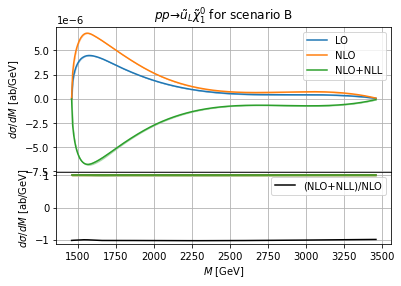

Running: 15 jobs


[1.1028904e-15+/-9.8198166e-19 2.0880184e-12+/-9.2720088e-16
 1.0302414e-11+/-4.6075208e-15 3.502678e-11+/-1.5699531e-14
 1.0439805e-10+/-4.6836425e-14 2.9268134e-10+/-1.3136304e-13
 7.9129039e-10+/-3.5522165e-13 2.0731359e-09+/-9.3074933e-13
 5.2119928e-09+/-2.3400994e-12 1.2234501e-08+/-5.492645e-12
 2.5403762e-08+/-1.1401678e-11 4.2380899e-08+/-1.9016514e-11
 4.8484055e-08+/-2.1787232e-11 2.9795479e-08+/-1.3453108e-11
 6.6569733e-09+/-3.0430036e-12]
[3.3831386e-12+/-4.4873817e-16 1.4829662e-10+/-3.3127419e-15
 2.6026788e-10+/-6.9677156e-15 4.1012515e-10+/-2.1802085e-14
 6.4152679e-10+/-5.8843565e-14 1.0417481e-09+/-1.5860932e-13
 1.8108243e-09+/-4.0488276e-13 3.4091275e-09+/-9.5463812e-13
 6.831697e-09+/-2.3900217e-12 1.3827844e-08+/-5.5250931e-12
 2.4174234e-08+/-1.135311e-11 3.685674e-08+/-1.8652993e-11
 3.7423065e-08+/-2.0499757e-11 1.8050896e-08+/-1.1626036e-11
 2.2679212e-09+/-1.7352291e-12]
[-7.753464e-16+/-1.9281426e-16 -1.9486161e-12+/-2.8920247e-14
 -9.6433858e-12+/-1.49390

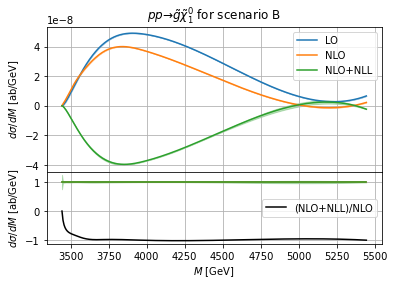

Running: 15 jobs


[7.2348199e-15+/-4.4299786e-18 4.413635e-13+/-1.7204015e-16
 7.5624713e-13+/-2.9538878e-16 1.1419421e-12+/-4.4503394e-16
 1.6529998e-12+/-6.4380086e-16 2.3544366e-12+/-9.1592707e-16
 3.3395787e-12+/-1.29544e-15 4.7488023e-12+/-1.8440829e-15
 6.7747895e-12+/-2.6595224e-15 9.5400124e-12+/-3.806905e-15
 1.2449366e-11+/-5.0490289e-15 1.2771729e-11+/-5.296811e-15
 7.2892275e-12+/-3.0768558e-15 1.1827427e-12+/-5.0588802e-16
 1.0970718e-14+/-4.7330546e-18]
[1.0851412e-14+/-4.6082499e-18 6.6326643e-13+/-2.4662656e-16
 1.1364534e-12+/-4.2295543e-16 1.7158846e-12+/-6.3620899e-16
 2.4834574e-12+/-9.2034537e-16 3.5362905e-12+/-1.3089925e-15
 5.0136894e-12+/-1.8527917e-15 7.1241267e-12+/-2.6339707e-15
 1.0153456e-11+/-3.7698721e-15 1.4289744e-11+/-5.3450477e-15
 1.8688066e-11+/-7.0424126e-15 1.9359306e-11+/-7.7276604e-15
 1.1382123e-11+/-4.3806753e-15 2.1138669e-12+/-8.6850375e-16
 2.4099628e-14+/-1.1138736e-17]
[-1.1093089e-14+/-1.0205299e-16 -6.7721882e-13+/-6.2380665e-15
 -1.1602318e-12+/-1.0713

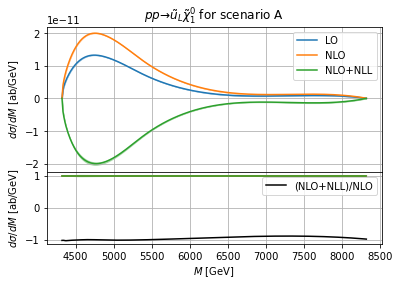

Running: 15 jobs


[2.5721607e-17+/-2.3163781e-20 3.5141688e-14+/-1.4001509e-17
 1.7094075e-13+/-6.8071804e-17 5.7907931e-13+/-2.3057187e-16
 1.7253456e-12+/-6.8698084e-16 4.846271e-12+/-1.9297781e-15
 1.3164416e-11+/-5.2429456e-15 3.4806333e-11+/-1.3867308e-14
 8.8907784e-11+/-3.5447814e-14 2.1382802e-10+/-8.5375174e-14
 4.5635647e-10+/-1.8269357e-13 7.6303584e-10+/-3.0632982e-13
 7.7920243e-10+/-3.1408788e-13 2.8933146e-10+/-1.17605e-13
 8.7802401e-12+/-3.5442839e-15]
[1.7688153e-13+/-4.0801417e-15 6.0273978e-12+/-1.6886024e-13
 2.9346412e-12+/-3.0929107e-14 1.6897257e-12+/-1.136049e-14
 1.6585051e-12+/-5.6822662e-15 3.1858092e-12+/-4.0118968e-15
 8.0086304e-12+/-7.2412373e-15 2.0618449e-11+/-1.5725517e-14
 5.1232362e-11+/-3.8638851e-14 1.1834317e-10+/-8.9492048e-14
 2.3524507e-10+/-1.8810442e-13 3.41515e-10+/-2.7222627e-13
 2.5959811e-10+/-2.0555775e-13 5.0898387e-11+/-3.9912446e-14
 4.2091441e-13+/-3.2679039e-16]
[-2.225472e-17+/-1.6402879e-18 -2.1019752e-14+/-1.9135327e-16
 -1.0015834e-13+/-9.246250

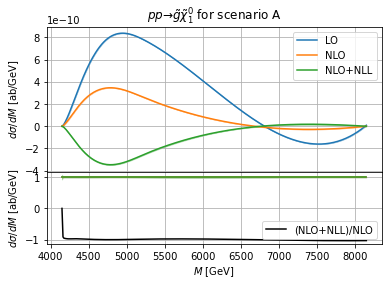

In [16]:
from sklearn.metrics import auc
for run_plot in [False,]:
    for diff_m,scenario in [(2000,"scenarioB_mod.in"),(4000,"scenarioA.in"),]:
        pdfs = [("MSHT20lo_as130","MSHT20nlo_as118"), #("CT18NLO","CT18NLO"),  ("NNPDF40_lo_as_01180","NNPDF40_nlo_as_01180")
        ]
        for lo_pdf,nlo_pdf in pdfs:
            for p in [1000002,1000021]:
                li = [hepi.Input(hepi.Order.NLO_PLUS_NLL, 13000, p, 1000022, scenario, lo_pdf, nlo_pdf, 1., 1.,precision=0.001,max_iters=25,id="exp_full_fixed_scale_r1")]

                
                li = hepi.scan_invariant_mass(li, diff_m,14+1,low=0.0001)
                #li = hepi.seven_point_scan(li)

                dl = rs.run(li, False)

                if not run_plot:
                    #dl = hepi.scale_error(li,dl)
                    #plot.data([],[],init=True,data_color='k')
                    #mask = dl["LO_SCALE"]!=np.array(None)
                    
                    #hepi.plot(dl, "invariant_mass", "LO",           plot_data=True,fill=True,logy=False, label="LO",xaxis="$M$ [GeV]",yaxis="$d\\sigma/dM$ [pb/GeV]")
                    #hepi.plot(dl, "invariant_mass", "NLO",         plot_data=True,fill=True,logy=False, label="NLO",xaxis="$M$ [GeV]",yaxis="$d\\sigma/dM$ [pb/GeV]")
                    #hepi.plot(dl, "invariant_mass", "NLO_PLUS_NLL", plot_data=True,fill=True,logy=False, label="NLO+NLL",xaxis="$M$ [GeV]",yaxis="$d\\sigma/dM$ [pb/GeV]")
                    #plt.show()
                    #plt.savefig(input.get_output_dir() + get_job_name() +  "_inv_mass_" + str(p) + "_" + str(nlo_pdf) + "_" +str(scenario) + ".pdf")
                    print(dl["LO"])
                    print(dl["NLO"])
                    print(dl["NLO_PLUS_NLL"])
                    hepi.mass_and_ratio_plot(dl,li,"invariant_mass",combined=True,plot_data=False,fill=True,scenario=scenario[0:8]+ " " + scenario[8],yscale=10**6,unit="ab")
                    plt.show()
                    #plt.savefig(input.get_output_dir()+ get_job_name()+"_mass_and_ratio_" + nlo_pdf + "_" + str(p)+ "_" + str("inv") + "_" +str(scenario) + ".pdf",bbox_inches = 'tight', pad_inches = 0)
    #wait()

